In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the avocado.csv dataset

avocado = pd.read_csv(
    r'C:\Users\Adam\avocado.csv',
    index_col = 0,
)
avocado.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
30,2016-05-29,0.84,268328.36,4644.30,164356.12,7148.83,92179.11,20884.04,69163.08,2131.99,conventional,2016,CincinnatiDayton
27,2015-06-21,1.56,11055.46,2962.12,7601.86,0.00,491.48,491.48,0.00,0.00,organic,2015,SanDiego
37,2017-04-16,0.76,1402904.54,820487.46,207708.35,3383.48,371325.25,312771.41,58553.84,0.00,conventional,2017,Houston
49,2016-01-17,1.59,14367.76,527.87,7394.43,316.27,6129.19,910.27,5218.92,0.00,organic,2016,BaltimoreWashington
38,2015-04-05,1.08,3140456.17,2257669.21,252737.98,26137.34,603911.64,387483.75,215544.56,883.33,conventional,2015,Southeast


In [3]:
sns.set()

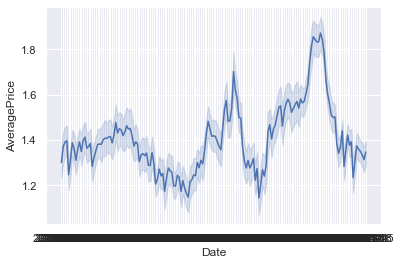

In [4]:
# Create a line plot showing the average
# price of avocado over months

sns.lineplot(
    x='Date',
    y='AveragePrice',
    data=avocado,
)

Text(0.5, 0, 'Mean prices')

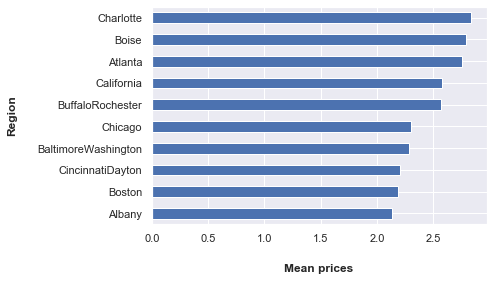

In [5]:
# Create a horizontal bar plot showing
# 10 highest mean prices depending on region

from matplotlib.ticker import StrMethodFormatter

ax = avocado.groupby('region').AveragePrice.max().head(10).sort_values().plot(kind = 'barh')
ax.set_ylabel('Region', labelpad=20, weight='bold', size=12)
ax.set_xlabel('Mean prices', labelpad=20, weight='bold', size=12)

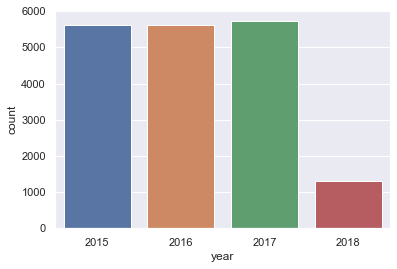

In [6]:
# Create a count plot for the year of the avocado

sns.countplot(
    'year',
    data=avocado,
)

C:\Users\Adam\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


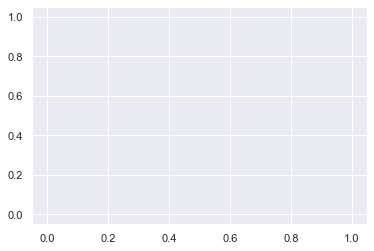

In [7]:
# Create a scatter plot of average price
# vs Total Volume for year 2018, 
# when the Total Volume is lower than 1e6


prep = avocado.loc[((avocado.year == '2018') & (avocado['Total Volume'] < 1000000))]
# prep    # shows just a header of the table, I wish I knew why

sns.scatterplot(
    x = 'AveragePrice',
    y = 'Total Volume',
    data=prep,
)

# ???

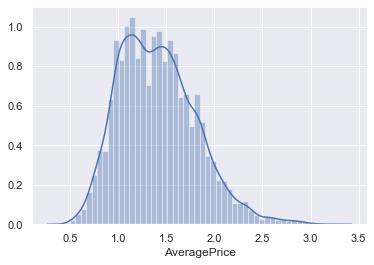

In [8]:
# Show the AveragePrice distribution.

sns.distplot(avocado['AveragePrice'])

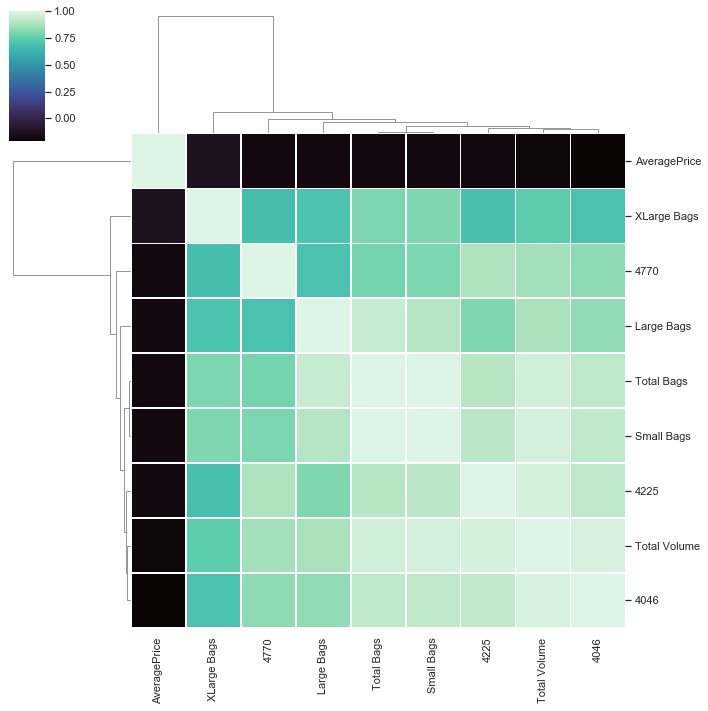

In [9]:
# Create a clustermap of avocado correlations.

cr = ['AveragePrice', 'Total Volume', '4046',
         '4225', '4770', 'Total Bags', 'Small Bags',
         'Large Bags', 'XLarge Bags']
sns.clustermap(
    avocado[cr].corr(),
    cmap="mako",
    linewidths=.75,
)

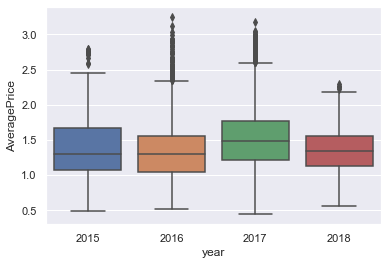

In [10]:
# Show a boxplot of average price per year.

sns.boxplot(
    x='year',
    y='AveragePrice',
    data=avocado,
)